In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ana-verse-2-0-p/train.parquet
/kaggle/input/ana-verse-2-0-p/sample_submission.parquet
/kaggle/input/ana-verse-2-0-p/test.parquet


## Importing Necessary Libraries...

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Taking a Good look at the data(test,train and submission)

In [50]:
df_train = pd.read_parquet("/kaggle/input/ana-verse-2-0-p/train.parquet")

In [51]:
df_test = pd.read_parquet("/kaggle/input/ana-verse-2-0-p/test.parquet")

In [52]:
df_test.head()

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213


In [53]:
df_test.shape

(409856, 7)

In [54]:
sample_sub = pd.read_parquet("/kaggle/input/ana-verse-2-0-p/sample_submission.parquet")

In [55]:
sample_sub

,ID,target
0,409856,0
1,409857,0
2,409858,0
3,409859,0
4,409860,0
5,409861,0
6,409862,0
7,409863,0
8,409864,0
9,409865,0


In [56]:
df_train.head()

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0


In [57]:
df_train.iloc[4995:5000]

,Date,X1,X2,X3,X4,X5,target
4995,2020-12-21,1.226298,5.496471,1.0,1.0,2.944439,0
4996,2020-12-21,1.218962,5.491084,1.0,1.0,2.944439,0
4997,2020-12-21,1.218962,5.491538,1.0,1.0,2.890372,0
4998,2020-12-21,1.096365,5.492691,1.0,1.0,2.944439,0
4999,2020-12-21,1.000000,5.493720,1.0,1.0,2.944439,0


In [58]:
# Count how many values are less than 1 in the "X3" column
(df_train["X3"] <= 1).sum()


np.int64(1504150)

In [59]:
# Count how many values are less than 1 in the "X4" column
(df_train["X4"] <= 1).sum()


np.int64(1149739)

In [60]:
df_train.dtypes

Date      datetime64[ns]
X1               float64
X2               float64
X3               float64
X4               float64
X5               float64
target            object
dtype: object

In [61]:
df_train.shape

(1639424, 7)

In [62]:
df_train["Date"].nunique()

1432

In [63]:
df_train.isna().sum()

Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64

## After using 'Describe' I noticed that columns "X3" and "X4" are highly skewed and had very high outliers, these can be the cause of an "Anomaly" so i will refrain from removing them and try to deal with them using log transform. Also included "X1" in the transforming because it had slight skew.

In [64]:
df_train.describe()

,Date,X1,X2,X3,X4,X5
count,1639424,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,1.139258e+00,5.488189e+00,4.110388e+32,2.706323e+29,1.187219e+00
min,2020-12-16 00:00:00,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2021-12-10 00:00:00,1.049171e+00,5.480597e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2022-11-30 00:00:00,1.105171e+00,5.488979e+00,1.000000e+00,1.000000e+00,6.931472e-01
75%,2023-11-23 00:00:00,1.214096e+00,5.496717e+00,1.000000e+00,2.718282e+00,2.890372e+00
max,2024-12-11 00:00:00,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00
std,NaN,1.391992e-01,1.342811e-02,2.346156e+35,5.812988e+31,1.304814e+00


## Further cells show all the columns plotted on histogram, "X3" and "X4" are plotted for only the lower 95 percentile of the data for better visualization.

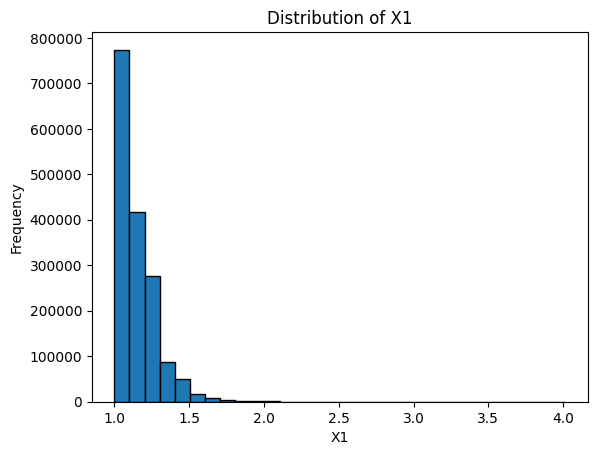

In [65]:
df_train["X1"].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of X1")
plt.xlabel("X1")
plt.ylabel("Frequency")
plt.show()

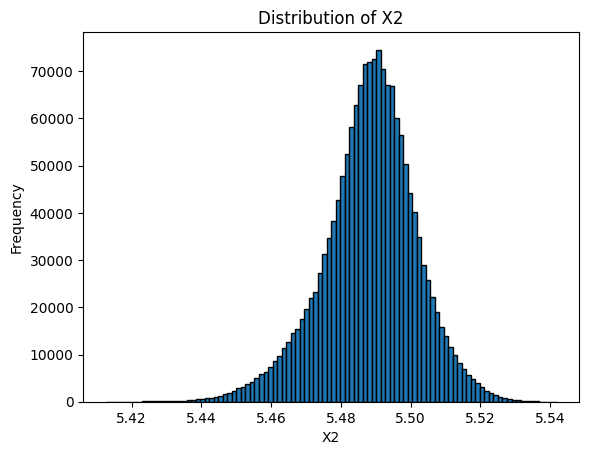

In [66]:
df_train["X2"].plot(kind='hist', bins=100, edgecolor='black')
plt.title("Distribution of X2")
plt.xlabel("X2")
plt.ylabel("Frequency")
plt.show()

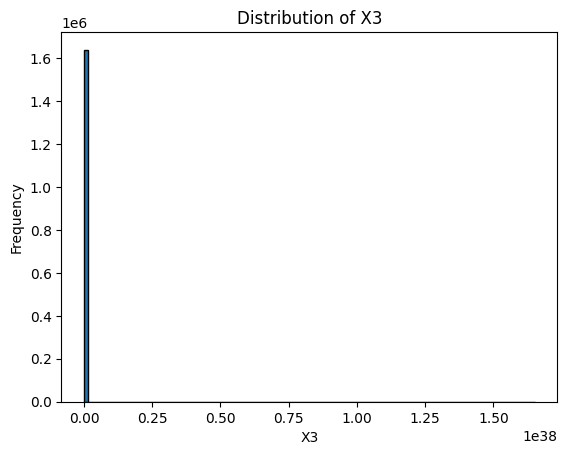

In [67]:
df_train["X3"].plot(kind='hist', bins=100, edgecolor='black')
plt.title("Distribution of X3")
plt.xlabel("X3")
plt.ylabel("Frequency")
plt.show()

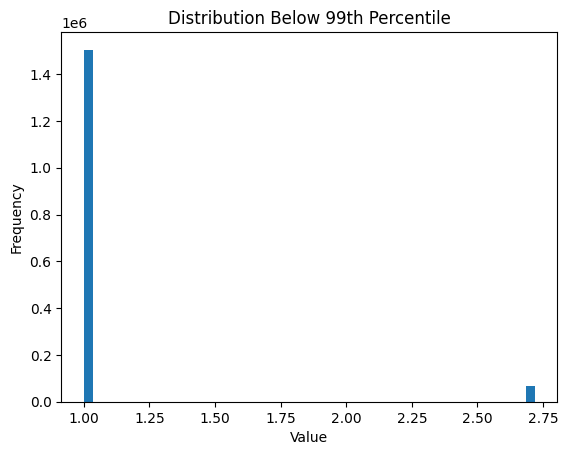

In [68]:
threshold = df_train["X3"].quantile(0.95)
df_train[df_train["X3"] <= threshold]["X3"].plot(kind='hist', bins=50)
plt.title("Distribution Below 99th Percentile")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

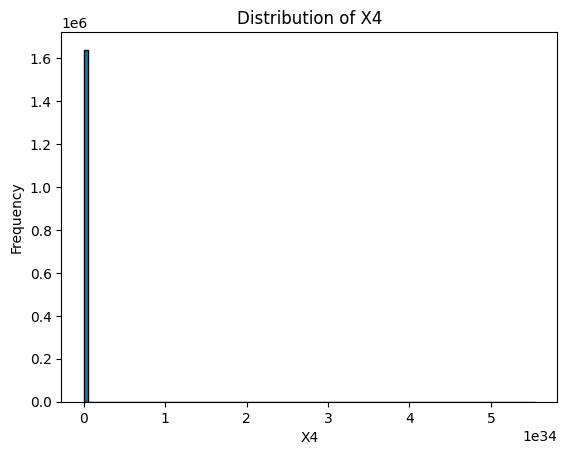

In [69]:
df_train["X4"].plot(kind='hist', bins=100, edgecolor='black')
plt.title("Distribution of X4")
plt.xlabel("X4")
plt.ylabel("Frequency")
plt.show()

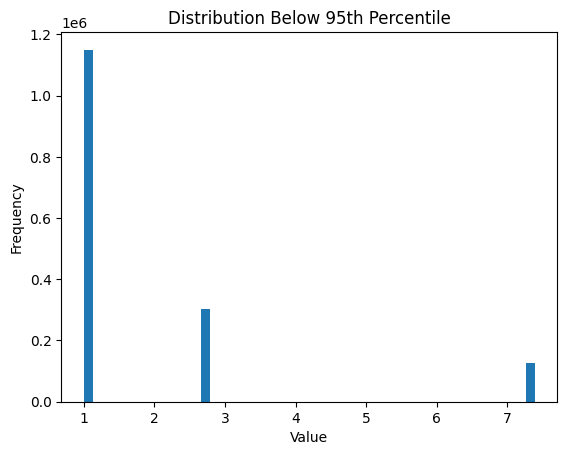

In [70]:
threshold = df_train["X4"].quantile(0.95)
df_train[df_train["X4"] <= threshold]["X4"].plot(kind='hist', bins=50)
plt.title("Distribution Below 95th Percentile")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

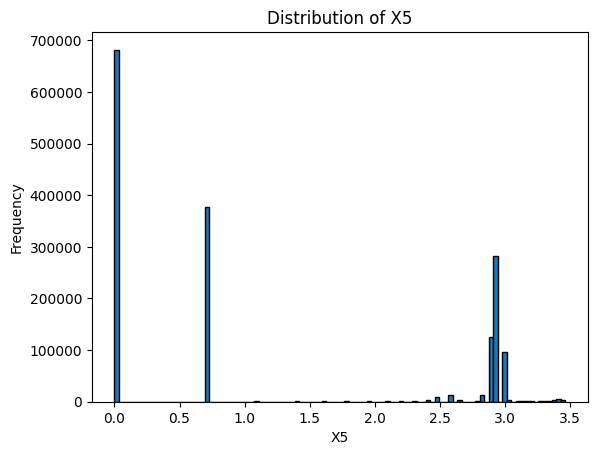

In [71]:
df_train["X5"].plot(kind='hist', bins=100, edgecolor='black')
plt.title("Distribution of X5")
plt.xlabel("X5")
plt.ylabel("Frequency")
plt.show()

## This function creates new datetime features from the "date" which were useful in boosting performance.

In [72]:
def date_conv(df):
    
    df["Date"] = pd.to_datetime(df["Date"])
    df["year"] = df["Date"].dt.year
    df["month"] = df["Date"].dt.month
    df["dayofweek"] = df["Date"].dt.dayofweek
    df["day"] = df["Date"].dt.day
    min_year = df["year"].min()
    df["year"] = df["year"] - min_year

    return df
    

In [73]:
df_train = date_conv(df_train)

In [74]:
df_train.head().style

,Date,X1,X2,X3,X4,X5,target,year,month,dayofweek,day
0,2020-12-16 00:00:00,1.518921,5.463154,1.000000,2.718282,2.890372,0,0,12,2,16
1,2020-12-16 00:00:00,1.546509,5.458010,1.000000,2.718282,2.833213,1,0,12,2,16
2,2020-12-16 00:00:00,1.645427,5.456560,1.000000,7.389056,2.890372,1,0,12,2,16
3,2020-12-16 00:00:00,1.652022,5.458479,1.000000,2.718282,2.890372,1,0,12,2,16
4,2020-12-16 00:00:00,1.695538,5.466709,1.000000,2.718282,2.890372,0,0,12,2,16


## Further code cells defing a function for log transforming and and its application on "df_train".

In [75]:
# Calculate skewness for multiple columns
skew_values = df_train[["X1", "X2", "X3", "X4", "X5"]].skew()

print(skew_values)

X1      1.936289
X2     -0.380227
X3    660.657945
X4    664.876766
X5      0.512101
dtype: float64


## "X3" and "X4" required more transformations as they were highly skewed.

In [76]:
def log_transform(df):
    df["X1"] = np.log1p(df["X1"])
    df["X3"] = np.log1p(np.log1p(np.log1p(df["X3"])))
    df["X4"] = np.log1p(np.log1p(np.log1p(df["X4"])))
    return df

In [77]:
df_train = log_transform(df_train)

In [78]:
df_train.head()

,Date,X1,X2,X3,X4,X5,target,year,month,dayofweek,day
0,2020-12-16,0.923831,5.463154,0.423036,0.609036,2.890372,0,0,12,2,16
1,2020-12-16,0.934723,5.458010,0.423036,0.609036,2.833213,1,0,12,2,16
2,2020-12-16,0.972833,5.456560,0.423036,0.760830,2.890372,1,0,12,2,16
3,2020-12-16,0.975322,5.458479,0.423036,0.609036,2.890372,1,0,12,2,16
4,2020-12-16,0.991598,5.466709,0.423036,0.609036,2.890372,0,0,12,2,16


In [79]:
df_train.describe()

,Date,X1,X2,X3,X4,X5,year,month,dayofweek,day
count,1639424,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,2022-12-03 07:23:43.817145600,7.584828e-01,5.488189e+00,4.677789e-01,5.184130e-01,1.187219e+00,2.424918e+00,6.495986e+00,2.997283e+00,1.566405e+01
min,2020-12-16 00:00:00,6.931472e-01,5.412539e+00,4.230359e-01,4.230359e-01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2021-12-10 00:00:00,7.174352e-01,5.480597e+00,4.230359e-01,4.230359e-01,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,8.000000e+00
50%,2022-11-30 00:00:00,7.443967e-01,5.488979e+00,4.230359e-01,4.230359e-01,6.931472e-01,2.000000e+00,7.000000e+00,3.000000e+00,1.600000e+01
75%,2023-11-23 00:00:00,7.948443e-01,5.496717e+00,4.230359e-01,6.090362e-01,2.890372e+00,3.000000e+00,1.000000e+01,5.000000e+00,2.300000e+01
max,2024-12-11 00:00:00,1.612404e+00,5.541852e+00,1.702680e+00,1.685370e+00,3.465736e+00,4.000000e+00,1.200000e+01,6.000000e+00,3.100000e+01
std,NaN,6.187625e-02,1.342811e-02,1.925555e-01,2.028125e-01,1.304814e+00,1.124472e+00,3.446579e+00,2.005976e+00,8.836483e+00


In [80]:
df_train[["X1", "X3", "X4"]].skew()

X1    1.504171
X3    4.956095
X4    3.352556
dtype: float64

## This is graph is created for further comparison with a graph created for the transformed data.

<Figure size 2500x2500 with 0 Axes>

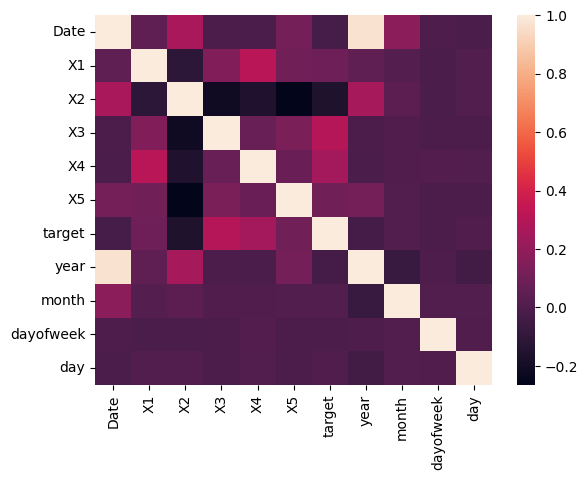

<Figure size 2500x2500 with 0 Axes>

In [81]:
sns.heatmap(df_train.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(25,25))

## Analysing the date time columns to find a relation with the "target", there is slight coorelation.

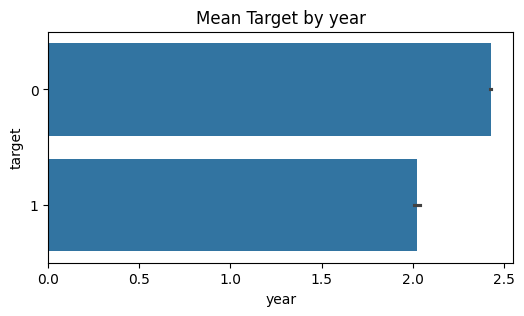

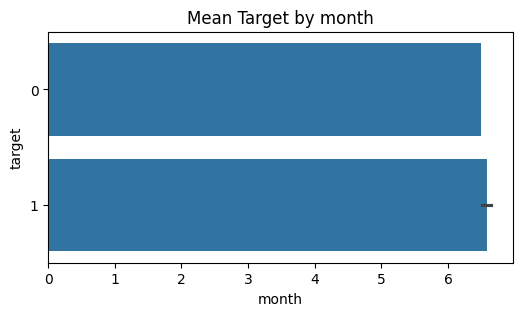

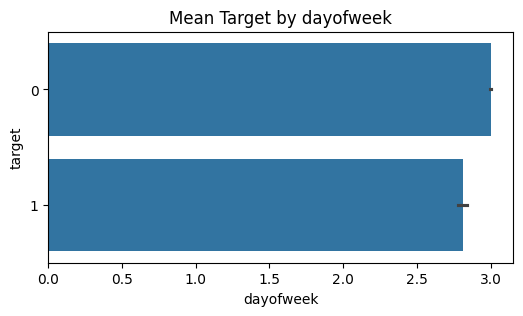

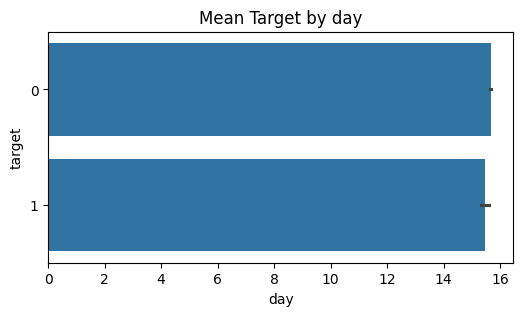

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["year", "month", "dayofweek", "day"]:
    plt.figure(figsize=(6, 3))
    sns.barplot(x=col, y="target", data=df_train)
    plt.title(f"Mean Target by {col}")
    plt.show()

## Further Code cells deal with the Scaling and modelling of the data.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [84]:
df_train["target"] = df_train["target"].astype(int)

## Scaler Function

In [85]:
from sklearn.preprocessing import RobustScaler

def Scaler(df,X_column_list):
    X = df[X_column_list]

    scaler = RobustScaler()

    X_scaled = scaler.fit_transform(X)

    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    return scaler, X_scaled_df

In [86]:
X_column_list = ["X1", "X2", "X3", "X4", "X5","year", "month", "dayofweek", "day"]
scaler, df_train_scaled = Scaler(df_train,X_column_list)

In [87]:
df_train = pd.concat([df_train_scaled.reset_index(drop=True), df_train["target"].reset_index(drop=True)], axis=1)

In [88]:
df_train

,X1,X2,X3,X4,X5,year,month,dayofweek,day,target
0,2.317992,-1.602070,0.0,1.000000,0.760188,-1.0,0.833333,-0.25,0.000000,0
1,2.458710,-1.921163,0.0,1.000000,0.740412,-1.0,0.833333,-0.25,0.000000,1
2,2.951018,-2.011122,0.0,1.816092,0.760188,-1.0,0.833333,-0.25,0.000000,1
3,2.983183,-1.892087,0.0,1.000000,0.760188,-1.0,0.833333,-0.25,0.000000,1
4,3.193434,-1.381511,0.0,1.000000,0.760188,-1.0,0.833333,-0.25,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1639419,-0.662060,-0.411491,0.0,0.000000,-0.239812,1.0,0.666667,-0.50,0.666667,0
1639420,-0.662060,-0.148850,0.0,0.000000,-0.239812,1.0,0.666667,-0.50,0.666667,0
1639421,-0.662060,-0.259436,0.0,0.000000,-0.239812,1.0,0.666667,-0.50,0.666667,0
1639422,-0.662060,-0.336705,0.0,0.000000,-0.239812,1.0,0.666667,-0.50,0.666667,0


In [89]:
X = df_train.iloc[:,:-1]  # your features
y = df_train["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## I used both RFC and XGB classifiers and they had very similar scores(RFC had slighty higher scores ~0.01 difference) but XGB was much faster to train for experimentation.

In [90]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[324944    174]
 [   815   1952]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    325118
           1       0.92      0.71      0.80      2767

    accuracy                           1.00    327885
   macro avg       0.96      0.85      0.90    327885
weighted avg       1.00      1.00      1.00    327885



## Peak F1 score i could get with Base XGB(Manual Tuning) was about 0.744 then i tried RandomizedSearchCV which helps to identify optimal hyperparameters for the model.

In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(
    scale_pos_weight=0.99,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    325118
           1       0.90      0.65      0.76      2767

    accuracy                           1.00    327885
   macro avg       0.95      0.83      0.88    327885
weighted avg       1.00      1.00      1.00    327885



## Using RandomizedSearchCV

In [97]:
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

best_score = -1
best_model = None
best_params = None

param_list = list(ParameterSampler(param_dist, n_iter=30, random_state=42))

for params in param_list:
    model = XGBClassifier(
        objective="binary:logistic",
        scale_pos_weight=0.99,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        **params
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = f1_score(y_test, preds)

    if score > best_score:
        best_score = score
        best_model = model
        best_params = params

print("Best F1:", best_score)
print("Best Params:", best_params)

Best F1: 0.8029844726759428
Best Params: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


## Following Cells deal with the pre-processing of the test dataset...

In [98]:
df_test = log_transform(df_test)

In [99]:
df_test = date_conv(df_test)

In [100]:
df_test.head()

,ID,Date,X1,X2,X3,X4,X5,year,month,dayofweek,day
0,0,2020-12-16,0.987828,5.463917,0.423036,0.760830,2.890372,0,12,2,16
1,1,2020-12-16,0.911818,5.454936,0.423036,0.760830,2.890372,0,12,2,16
2,2,2020-12-16,0.772032,5.471136,0.423036,0.423036,2.890372,0,12,2,16
3,3,2020-12-16,0.693147,5.467385,0.423036,0.423036,2.890372,0,12,2,16
4,4,2020-12-16,0.693147,5.453995,0.423036,0.423036,2.833213,0,12,2,16


In [101]:
X_test_final = df_test[["X1", "X2", "X3", "X4", "X5","year", "month", "dayofweek", "day"]]  # your features

In [102]:
X_test_final_scaled = scaler.transform(X_test_final)
X_test_final = pd.DataFrame(X_test_final_scaled, columns=X_test_final.columns)

In [103]:
X_test_final

,X1,X2,X3,X4,X5,year,month,dayofweek,day
0,3.144733,-1.554741,0.0,1.816092,0.760188,-1.0,0.833333,-0.25,0.000000
1,2.162815,-2.111819,0.0,1.816092,0.760188,-1.0,0.833333,-0.25,0.000000
2,0.357009,-1.106912,0.0,0.000000,0.760188,-1.0,0.833333,-0.25,0.000000
3,-0.662060,-1.339589,0.0,0.000000,0.760188,-1.0,0.833333,-0.25,0.000000
4,-0.662060,-2.170192,0.0,0.000000,0.740412,-1.0,0.833333,-0.25,0.000000
...,...,...,...,...,...,...,...,...,...
409851,0.095262,-0.367640,0.0,1.000000,-0.239812,1.0,0.666667,-0.50,0.666667
409852,-0.054152,-0.693390,0.0,1.816092,-0.239812,1.0,0.666667,-0.50,0.666667
409853,0.040749,-0.558746,0.0,1.000000,-0.239812,1.0,0.666667,-0.50,0.666667
409854,-0.662060,-0.174550,0.0,0.000000,-0.239812,1.0,0.666667,-0.50,0.666667


## Now we predict and Upload the submission file.

In [104]:
y_test_RFC = model.predict(X_test_final)

In [105]:
y_test_XGB = xgb_model.predict(X_test_final)

In [106]:
y_test_XGB_RCV = best_model.predict(X_test_final)

In [107]:
y_test_RFC

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
y_test_XGB

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
y_test_XGB_RCV

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
new_df_RFC = pd.DataFrame(y_test_RFC, columns=["target"])
df_combined_RFC = pd.concat([df_test.reset_index(drop=True), new_df_RFC.reset_index(drop=True)], axis=1)
df_combined_RFC = df_combined_RFC.drop(["X1", "X2", "X3","X4","X5","Date","year", "month", "dayofweek", "day"], axis=1)

df_combined_RFC.to_parquet("submission_RFC.parquet", index=False)

In [111]:
df_combined_RFC.shape

(409856, 2)

In [112]:
new_df_XGB = pd.DataFrame(y_test_XGB, columns=["target"])
df_combined_XGB = pd.concat([df_test.reset_index(drop=True), new_df_XGB.reset_index(drop=True)], axis=1)
df_combined_XGB = df_combined_XGB.drop(["X1", "X2", "X3","X4","X5","Date","year", "month", "dayofweek", "day"], axis=1)
df_combined_XGB.to_parquet("submission_XGB.parquet", index=False)

In [113]:
df_combined_XGB.shape

(409856, 2)

In [114]:
new_df_XGB_RCV = pd.DataFrame(y_test_XGB_RCV, columns=["target"])
df_combined_XGB_RCV = pd.concat([df_test.reset_index(drop=True), new_df_XGB_RCV.reset_index(drop=True)], axis=1)
df_combined_XGB_RCV = df_combined_XGB_RCV.drop(["X1", "X2", "X3","X4","X5","Date","year", "month", "dayofweek", "day"], axis=1)
df_combined_XGB_RCV.to_parquet("submission_XGB_RCV.parquet", index=False)

In [115]:
df_combined_XGB_RCV.shape

(409856, 2)